### Experiments Notebook

In [1]:
from pattern import Pattern
import time

p1 = Pattern(['x', 'x'])
p2 = Pattern(['1', 'x'])

print(p1 == p2)  # False
print(p1.is_ancestor_of(p2))  # True
print(p1.get_dimension())  # 2
print(p1.get_level())  # 0
print(p1.find_right_most_deterministic_index())  # -1
print(p1.find_right_most_non_deterministic_index())  # 1)

False
True
2
0
-1
1


In [2]:
import pandas as pd

df = pd.read_csv('airbnb_1000.csv').dropna()
print(f'Dataset has {len(df.columns)} columns')
attributes = [1, 2, 3]
df = df.iloc[:, attributes]

#print few rows of the dataset
print(df.head())

#create array with cardinalities of each attribute
cardinalities = [len(df.iloc[:,i].unique()) for i in range(len(attributes))]
f'Attributes cardinalities:{cardinalities}'

Dataset has 41 columns
  Accommodates Bathrooms  Bedrooms
0            6       1.5       2.0
1            4         1       1.0
2            3         1       1.0
3            2         1       1.0
4            2         1       1.0


'Attributes cardinalities:[16, 16, 9]'

In [3]:
from patternBreaker import PatternBreaker
pattern_breaker = PatternBreaker('airbnb_1000.csv', 3, [1,2,3], True)
mups_pattern_breaker = pattern_breaker.find_max_uncovered_pattern_set()
print(f'There are {len(mups_pattern_breaker)} MUPs!\n')
print(f'Number of total patterns visited: {pattern_breaker.debugger.get_node_visited()}')
print(f'Execution time: {pattern_breaker.debugger.timeElapsed} seconds')
for mup in mups_pattern_breaker:
    print(mup)

There are 370 MUPs!

Number of total patterns visited: 555
Execution time: 0.6145889759063721 seconds
11,9,x (cov:0)
5,4,2 (cov:0)
5,12,x (cov:0)
x,14,3 (cov:2)
x,6,8 (cov:0)
11,x,3 (cov:0)
1,x,2 (cov:0)
4,11,x (cov:0)
x,9,0 (cov:0)
13,0,x (cov:0)
13,11,x (cov:2)
x,1,5 (cov:1)
7,8,x (cov:0)
2,7,x (cov:2)
x,2,6 (cov:0)
x,13,6 (cov:1)
5,1,1 (cov:1)
3,6,x (cov:1)
10,5,x (cov:0)
6,14,x (cov:0)
1,2,x (cov:2)
1,13,x (cov:0)
1,x,6 (cov:0)
9,4,x (cov:1)
3,x,8 (cov:0)
4,14,x (cov:0)
x,9,4 (cov:0)
12,1,x (cov:1)
12,12,x (cov:0)
7,11,x (cov:1)
x,13,1 (cov:1)
0,2,1 (cov:1)
4,0,0 (cov:1)
3,9,x (cov:0)
2,x,8 (cov:0)
x,5,2 (cov:1)
6,6,x (cov:1)
11,1,x (cov:0)
11,12,x (cov:0)
3,x,3 (cov:1)
9,7,x (cov:0)
x,9,8 (cov:2)
12,4,x (cov:1)
10,7,x (cov:0)
x,12,0 (cov:1)
5,1,0 (cov:2)
13,3,x (cov:0)
13,14,x (cov:0)
x,4,5 (cov:0)
2,x,3 (cov:0)
6,x,4 (cov:0)
4,x,5 (cov:0)
8,x,6 (cov:1)
x,5,6 (cov:1)
10,8,x (cov:1)
11,4,x (cov:0)
1,x,5 (cov:0)
5,7,x (cov:0)
x,9,3 (cov:0)
x,1,8 (cov:1)
1,5,x (cov:0)
0,2,0 (cov:1)
4

### PatterCombiner

#### We can observe that the first MUPs (stored in a list and appended sequentially) were fully deterministic, in contrast to the breaker. This reflects a clear bottom-up approach.

In [4]:
from patternCombiner import PatternCombiner
pattern_combiner = PatternCombiner('airbnb_1000.csv', 3, [1,2,3], True)
mups_pattern_combiner = pattern_combiner.find_max_uncovered_pattern_set()
print(f'There are {len(mups_pattern_breaker)} MUPs!\n')
print(f'Number of total patterns visited: {pattern_combiner.debugger.get_node_visited()}')
print(f'Execution time: {pattern_combiner.debugger.timeElapsed} seconds')
for mup in mups_pattern_combiner:
    print(mup)

There are 370 MUPs!

Number of total patterns visited: 2842
Execution time: 0.6244642734527588 seconds
5,4,2 (cov:0)
11,9,x (cov:0)
5,12,x (cov:0)
x,14,3 (cov:2)
x,6,8 (cov:0)
11,x,3 (cov:0)
1,x,2 (cov:0)
4,11,x (cov:0)
x,9,0 (cov:0)
13,0,x (cov:0)
13,11,x (cov:2)
x,1,5 (cov:1)
7,8,x (cov:0)
2,7,x (cov:2)
x,2,6 (cov:0)
x,13,6 (cov:1)
5,1,1 (cov:1)
3,6,x (cov:1)
10,5,x (cov:0)
6,14,x (cov:0)
1,2,x (cov:2)
1,13,x (cov:0)
1,x,6 (cov:0)
9,4,x (cov:1)
3,x,8 (cov:0)
x,9,4 (cov:0)
4,14,x (cov:0)
12,1,x (cov:1)
12,12,x (cov:0)
7,11,x (cov:1)
x,13,1 (cov:1)
0,2,1 (cov:1)
4,0,0 (cov:1)
3,9,x (cov:0)
2,x,8 (cov:0)
x,5,2 (cov:1)
6,6,x (cov:1)
11,1,x (cov:0)
11,12,x (cov:0)
3,x,3 (cov:1)
9,7,x (cov:0)
x,9,8 (cov:2)
12,4,x (cov:1)
10,7,x (cov:0)
5,1,0 (cov:2)
x,12,0 (cov:1)
13,3,x (cov:0)
13,14,x (cov:0)
x,4,5 (cov:0)
2,x,3 (cov:0)
6,x,4 (cov:0)
4,x,5 (cov:0)
8,x,6 (cov:1)
x,5,6 (cov:1)
10,8,x (cov:1)
11,4,x (cov:0)
1,x,5 (cov:0)
5,7,x (cov:0)
x,9,3 (cov:0)
x,1,8 (cov:1)
1,5,x (cov:0)
0,2,0 (cov:1)


In [5]:
# Sanity check
assert pattern_breaker.debugger.get_num_of_mups() == pattern_combiner.debugger.get_num_of_mups()
print('Sanity check: Number of MUPs are equal!')

Sanity check: Number of MUPs are equal!


# DeepDiver
A couple of words about DeepDiver.. TBD

In [6]:
from DeepDiver import DeepDiver
deep_diver = DeepDiver('airbnb_1000.csv', 3, [1,2,3], True)
mups_deep_diver = deep_diver.find_max_uncovered_pattern_set()
print(f'There are {deep_diver.debugger.get_num_of_mups()} MUPs!\n')
print(f'Number of total patterns visited: {deep_diver.debugger.get_node_visited()}')
print(f'Execution time: {deep_diver.debugger.timeElapsed} seconds')
for mup in mups_deep_diver:
    print(mup)

There are 370 MUPs!

Number of total patterns visited: 1332
Execution time: 0.7068958282470703 seconds
11,9,x (cov:0)
5,4,2 (cov:0)
5,12,x (cov:0)
x,14,3 (cov:2)
x,6,8 (cov:0)
11,x,3 (cov:0)
1,x,2 (cov:0)
4,11,x (cov:0)
x,9,0 (cov:0)
13,11,x (cov:2)
13,0,x (cov:0)
x,1,5 (cov:1)
7,8,x (cov:0)
2,7,x (cov:2)
x,13,6 (cov:1)
x,2,6 (cov:0)
5,1,1 (cov:1)
10,5,x (cov:0)
3,6,x (cov:1)
6,14,x (cov:0)
1,13,x (cov:0)
1,2,x (cov:2)
1,x,6 (cov:0)
9,4,x (cov:1)
3,x,8 (cov:0)
x,9,4 (cov:0)
4,14,x (cov:0)
12,12,x (cov:0)
12,1,x (cov:1)
7,11,x (cov:1)
x,13,1 (cov:1)
0,2,1 (cov:1)
4,0,0 (cov:1)
3,9,x (cov:0)
2,x,8 (cov:0)
x,5,2 (cov:1)
6,6,x (cov:1)
11,12,x (cov:0)
11,1,x (cov:0)
3,x,3 (cov:1)
9,7,x (cov:0)
x,9,8 (cov:2)
12,4,x (cov:1)
10,7,x (cov:0)
x,12,0 (cov:1)
5,1,0 (cov:2)
13,14,x (cov:0)
13,3,x (cov:0)
x,4,5 (cov:0)
2,x,3 (cov:0)
6,x,4 (cov:0)
4,x,5 (cov:0)
8,x,6 (cov:1)
x,5,6 (cov:1)
10,8,x (cov:1)
11,4,x (cov:0)
1,x,5 (cov:0)
5,7,x (cov:0)
x,9,3 (cov:0)
x,1,8 (cov:1)
1,5,x (cov:0)
0,2,0 (cov:1)


In [7]:
# Sanity check
assert len(mups_pattern_breaker) == len(mups_pattern_combiner) == len(mups_deep_diver)

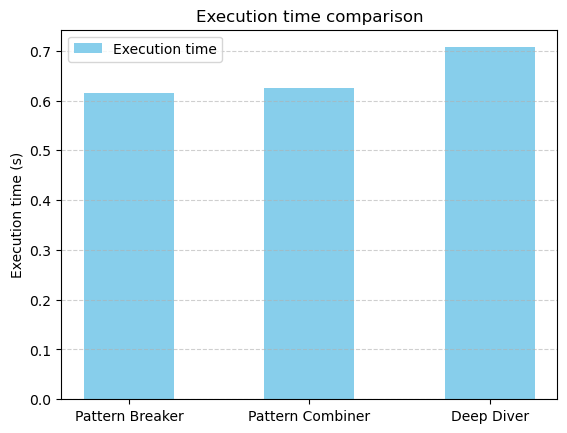

   Pattern Breaker  Pattern Combiner  Deep Diver
0         0.614589          0.624464    0.706896


In [8]:
# Time comparison (via graph)
import matplotlib.pyplot as plt
import numpy as np

# data
x = ['Pattern Breaker', 'Pattern Combiner', 'Deep Diver']
y = [pattern_breaker.debugger.timeElapsed, pattern_combiner.debugger.timeElapsed, deep_diver.debugger.timeElapsed]

# plot
fig, ax = plt.subplots()
ax.bar(x, y, color='skyblue', align='center', width=0.5)
plt.ylabel('Execution time (s)')
plt.title('Execution time comparison')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Execution time'])
plt.show()

# Time comparison (via table)
import pandas as pd

data = {
    'Pattern Breaker': [pattern_breaker.debugger.timeElapsed],
    'Pattern Combiner': [pattern_combiner.debugger.timeElapsed],
    'Deep Diver': [deep_diver.debugger.timeElapsed]
}
df = pd.DataFrame(data)
print(df)

In [9]:
# Larger dataset
# Run all 3 algorithms against the larger dataset, and compare their execution
# times as done above

df = pd.read_csv('airbnb_100000.csv').dropna()
attributes = [1, 2, 3]
df = df.iloc[:, attributes]

#print few rows of the dataset
print(df.head())

#create array with cardinalities of each attribute
cardinalities = [len(df.iloc[:,i].unique()) for i in range(len(attributes))]
f'Attributes cardinalities:{cardinalities}'


  Accommodates Bathrooms  Bedrooms
0            4         1       1.0
1            4         2       3.0
2            4         1       1.0
3            6       2.5       2.0
4            2         1       1.0


'Attributes cardinalities:[24, 17, 11]'

In [13]:
def run_algorithms(file_name, attributes, threshold):
    pattern_breaker = PatternBreaker(file_name, threshold, attributes, True)
    mups_pattern_breaker = pattern_breaker.find_max_uncovered_pattern_set()
    print(f'There are {pattern_breaker.debugger.get_num_of_mups()} MUPs!\n')
    print(f'Number of total patterns visited: {pattern_breaker.debugger.get_node_visited()}')
    print(f'Execution time: {pattern_breaker.debugger.timeElapsed} seconds')

    pattern_combiner = PatternCombiner(file_name, threshold, attributes, True)
    mups_pattern_combiner = pattern_combiner.find_max_uncovered_pattern_set()
    print(f'There are {pattern_combiner.debugger.get_num_of_mups()} MUPs!\n')
    print(f'Number of total patterns visited: {pattern_combiner.debugger.get_node_visited()}')
    print(f'Execution time: {pattern_combiner.debugger.timeElapsed} seconds')

    deep_diver = DeepDiver(file_name, threshold, attributes, True)
    mups_deep_diver = deep_diver.find_max_uncovered_pattern_set()
    print(f'There are {deep_diver.debugger.get_num_of_mups()} MUPs!\n')
    print(f'Number of total patterns visited: {deep_diver.debugger.get_node_visited()}')
    print(f'Execution time: {deep_diver.debugger.timeElapsed} seconds')

    #find a mup in pattern breaker that is not in pattern combiner
    for mup in mups_pattern_breaker:
        if mup not in mups_pattern_combiner:
            print(mup)
            break

    # Sanity check
    assert len(mups_pattern_breaker) == len(mups_pattern_combiner) == len(mups_deep_diver)

    # Time comparison (via graph)

    # data
    x = ['Pattern Breaker', 'Pattern Combiner', 'Deep Diver']
    y = [pattern_breaker.debugger.timeElapsed, pattern_combiner.debugger.timeElapsed, deep_diver.debugger.timeElapsed]

    # plot
    fig, ax = plt.subplots()
    ax.bar(x, y, color='skyblue', align='center', width=0.5)
    plt.ylabel('Execution time (s)')
    plt.title('Execution time comparison')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(['Execution time'])
    plt.show()

There are 370 MUPs!

Number of total patterns visited: 555
Execution time: 0.5333340167999268 seconds
There are 370 MUPs!

Number of total patterns visited: 2842
Execution time: 0.6019601821899414 seconds
There are 370 MUPs!

Number of total patterns visited: 1332
Execution time: 0.6588430404663086 seconds


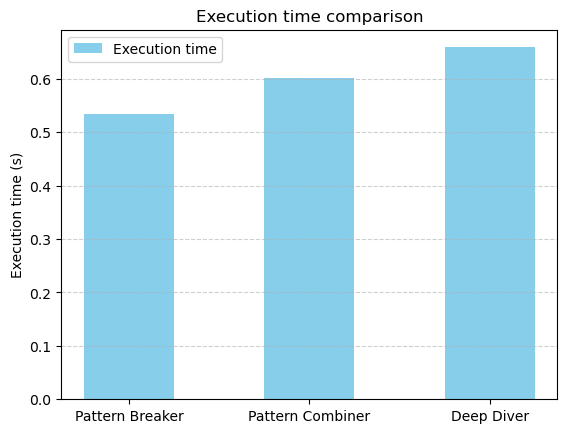

In [11]:
run_algorithms('airbnb_1000.csv', [1,2,3], 3)

There are 953 MUPs!

Number of total patterns visited: 2091
Execution time: 2.8153932094573975 seconds
There are 953 MUPs!

Number of total patterns visited: 5103
Execution time: 3.9566469192504883 seconds
There are 953 MUPs!

Number of total patterns visited: 4687
Execution time: 5.868870258331299 seconds


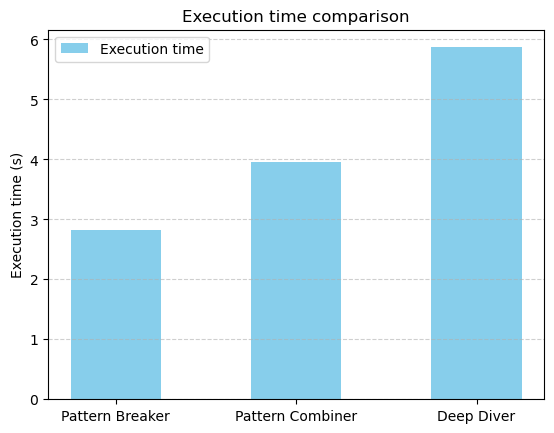

In [12]:
run_algorithms('airbnb_100000.csv', [1,2,3], 3)

There are 505 MUPs!

Number of total patterns visited: 3549
Execution time: 30.643383979797363 seconds
There are 505 MUPs!

Number of total patterns visited: 15917
Execution time: 13.555918216705322 seconds
There are 505 MUPs!

Number of total patterns visited: 5162
Execution time: 14.323530197143555 seconds


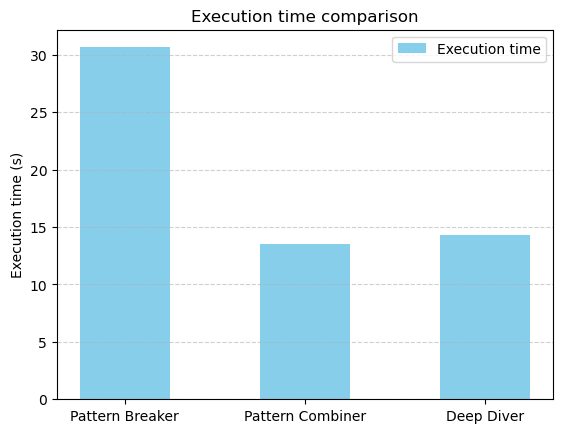

In [18]:
run_algorithms('airbnb_100000.csv', [3,4,5,6,7,10],50)